## 1. 数据处理和分析

### 1.1 数据预处理

读取从 [UN Comtrade Database](https://comtrade.un.org/data/) 获取的 2019 年全球铜及其精炼物（2603）贸易记录，并处理：

1. 去除贸易对象为 World 的数据行
2. 并保留关心的数据列：报告者及其代码、贸易对象及代码、贸易类型、贸易额

**！注**：数据中上报者（Reporter）可能包含国家和地区以及**中国**港澳台地区，为方便起见以下统称“国家”.

In [1]:
from src.main import *

data_overview('src/data/format-2016-world-copper-2063-trade.json')

False
     pfCode    yr  period  periodDesc  aggrLevel  IsLeaf  rgCode  rgDesc  rtCode    rtTitle  ... TradeValue  CIFValue FOBValue estCode  Reporter Code   Reporter Partner Code         Partner Trade Flow Trade Value (US$)
0        H4  2016    2016        2016          4       0       2  Export      32  Argentina  ...  632963025       NaN      NaN       0             32  Argentina            0           World     Export         632963025
1        H4  2016    2016        2016          4       0       2  Export      32  Argentina  ...   20025236       NaN      NaN       0             32  Argentina          100        Bulgaria     Export          20025236
2        H4  2016    2016        2016          4       0       2  Export      32  Argentina  ...  137876595       NaN      NaN       0             32  Argentina          246         Finland     Export         137876595
3        H4  2016    2016        2016          4       0       2  Export      32  Argentina  ...  155770517       NaN 

,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
1,32,Argentina,100,Bulgaria,Export,20025236
2,32,Argentina,246,Finland,Export,137876595
3,32,Argentina,276,Germany,Export,155770517
4,32,Argentina,392,Japan,Export,145075089
5,32,Argentina,699,India,Export,36485970
...,...,...,...,...,...,...
1229,975,ASEAN,757,Switzerland,Export,378830
1230,975,ASEAN,792,Turkey,Import,64238
1231,975,ASEAN,826,United Kingdom,Import,16233
1232,975,ASEAN,842,USA,Import,2571487


### 1.2 数据分析与检验

1. 获取贸易参与者

In [2]:
check_data()

上报进贸易记录的国家总数（不含重复）:  91
上报进贸易记录的中的贸易对象国家总数（不含重复）:  109
上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）:  121


2. 数据检验

从上面数据可以看出，各国上报的记录显然是有出入的，即上报记录中涉及的国家数要比上报数据的国家数多，这至少说明了一些参与了贸易的国家没有上报贸易记录

下面以中国上报的记录为例检查和说明：

        1. 查看中国上报的进口记录

In [3]:
view_logs_by_china()

中国上报的进口记录中，涉及出口国家的个数:  54


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
223,156,China,8,Albania,Import,499605
224,156,China,36,Australia,Import,1006608550
225,156,China,51,Armenia,Import,237261630
226,156,China,56,Belgium,Import,26822510
227,156,China,68,Bolivia (Plurinational State of),Import,42079813
229,156,China,72,Botswana,Import,2282360
230,156,China,76,Brazil,Import,89601165
231,156,China,100,Bulgaria,Import,14403453
232,156,China,104,Myanmar,Import,3067077
233,156,China,124,Canada,Import,655558491


        2. 查看中国进口对象上报的对中国的出口记录

In [4]:
view_logs_about_china()

全球上报了对中国有出口记录的国家 55


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$)
13,51,Armenia,156,China,Export,68184072
28,36,Australia,156,China,Export,1078448732
70,68,Bolivia (Plurinational State of),156,China,Export,17187532
93,76,Brazil,156,China,Export,144771792
115,100,Bulgaria,156,China,Export,126076809
145,124,Canada,156,China,Export,600640136
194,152,Chile,156,China,Export,5707186866
287,344,"China, Hong Kong SAR",156,China,Export,5322455
291,170,Colombia,156,China,Export,10235038
300,203,Czechia,156,China,Export,9771


对比上面两个表格，显然各国出入口数据是**普遍**有出入的：

首先，进出口对象数量上就不一致：中国上报记录中显示，中国 2019 年共从 56 个国家进口铜资源；而只有 43 个国家上报了对中国出口铜资源的记录

其次，对于有些进出口双方都上报了记录的情况，双方上报的贸易金额不一致，有的甚至出入较大

这可能是有以下的原因导致的：

1. 由于政策和统计方法不同导致的上报数据的结果不同. 
2. 由于货物在进出口过程中经第三方国家中转，而进出口国家对于出入口的目标国家登记不一致导致.
3. 其他可能原因.

## 2. 构建网络

根据以上数据和分析，构建有向加权网络是合适的，具体如下：

1. 以国家为节点，进出口关系为指向（出口国 -> 进口国），贸易金额为权重，构建有向加权图

2. 对于进出口关系，忽略各个国家之间上报数据的差异，即只要在任何一条记录中出现进出口关系即双方存在贸易关系，则为对应节点添加连边

3. 对于贸易金额，若两方上报金额不一致则取两者均值
  

绘制网络：

In [5]:
# G.net.draw()


## 3. 基于连接信息熵的节点重要性

### 3.1 定义

#### 3.1.1 连接度 $A_i$
定义有向加权网络中节点的连接度为
$$
A_i = \theta\sum_{j\in \Gamma_{i\_in}}k_j + (1-\theta)\sum_{j\in \Gamma_{i\_out}}k_j
$$

其中 $\Gamma_{i\_in}$ 是指向节点 $i$ 的邻居节点集，$\Gamma_{i\_out}$ 是由节点 $i$ 指向的邻居节点集；$k_j$ 是对应节点的度；$\theta \in [0,1]$ 是参数.

具体地，有向加权网络中，定义节点 $k_j$ 的度为：

$$
\begin{aligned}
k_j &= \lambda k_i^{in} + (1-\lambda)k_i^{out} \\
    &= \lambda \sum_{i=1}^m w_{ij} + (1 - \lambda)\sum_{i=1}^m w_{ji}
\end{aligned}
$$

其中 $w_{uv}$ 表示由节点 $u$ 指向节点 $v$ 的边的权重，若该边不存在则记为 $0$；$\lambda$ 为出入边的权重参数.

具体地上式表示，在节点 $j$ 与其邻居节点的连边中，按权重求出入连边的权重和.

#### 3.1.2 连边概率 $P_{i_j}$

定义连边概率 $P_{i_j}$ 为节点 $i$ 被其邻居节点 $j$ 选择进行连边的概率：
$$
P_{i_j} = \frac{k_i}{A_j}, \ \ \ \ (j\in\Gamma_i)
$$

#### 3.1.3 连接信息熵 $E_i$

定义有向网络中连接信息熵如下：

$$
E_i = \sum\limits_{j\in\Gamma_j}\left| P_{i_j}\log_2 P_{i_j} \right|
$$

*这里取绝对值是因为 $\theta$ 加权的原因，$P_{i_j}$ 可能大于 $1$*

## 4. 实验和结果

### 4.1 求各节点的连接信息熵
根据第 3 节给出的定义，求各节点的连接信息熵，并将前 20 的连接信息熵绘图如下：

*实验中取 $\theta, \lambda = 0.7$.*

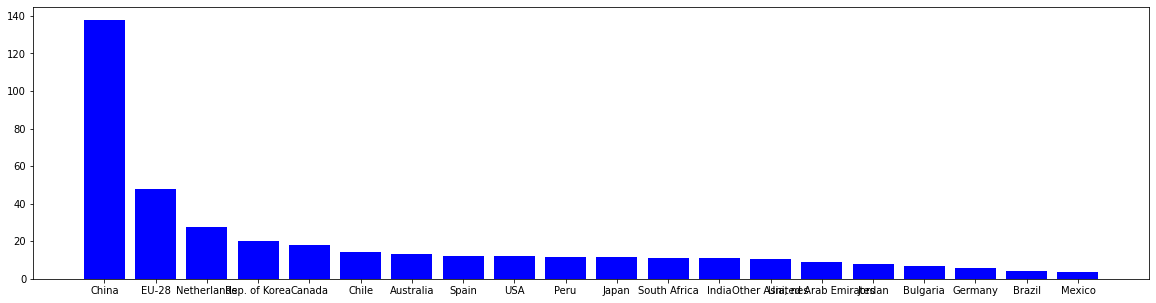

In [7]:
G.net.drawEntropiesBar()

从上表可以看出，中国、智利、西班牙等铜贸易大国位列前茅，且前二十名均为贸易和工业水平发达的国家，说明使用“连接信息熵”来衡量铜贸易网络节点的重要性具备一定的合理性.

### 4.2 层次聚类
对个节点的信息熵进行层次聚类，选择聚类数为 6；并为每个节点设置聚类标签，按熵值从大到小标记为 1 - 6

In [8]:
nodes = G.net.getSortedEntropies()

Es_clusters, nodes = cluster_nodes(nodes, "E", "label", 6)

In [9]:
show_cluster_list(nodes, "label")

,code,name
label,,
1,156,China
2,97,EU-28
3,528,Netherlands
4,"410,124","Rep. of Korea,Canada"
5,"152,36,724,842,604,392,710,699,490,784,400,100...","Chile,Australia,Spain,USA,Peru,Japan,South Afr..."
6,"76,484,975,246,616,608,360,757,268,894,516,180...","Brazil,Mexico,ASEAN,Finland,Poland,Philippines..."


上表根据连接信息熵对网络中的 119 个节点进行了层次聚类，划分出 6 个层次，各个层次中的国家名称及代码列在各行.

### 4.3 选取属性并进行离散化划分

选取以下属性，并选择聚类层数：

* IS：入强度, 6 层，反应进口贸易总额
* OS: 出强度，6 层，反应出口贸易总额
* DC: 度中心性，6 层，反应贸易伙伴的数量
* BC: 中介中心性，6 层，反应在贸易网络中的枢纽性质（不考虑权重）
* CC: 接近中心性，6 层，反应与其他贸易者之间的平均距离（不考虑权重）

属性值由大到小标记为 1-6

In [10]:
nodes, attributes = set_attributes(nodes)

for attr, values in attributes.items():
    cluster, nodes = cluster_nodes(
        nodes, attr, attr, values["layer"])
      
    values["cluster"] = cluster

show_nodes_attribute(nodes)


     code                              name  IS  OS  DC  BC  CC  label
0     156                             China   1   6   1   1   1      1
1      97                             EU-28   3   6   2   2   2      2
2     528                       Netherlands   6   6   4   4   2      3
3     124                            Canada   5   4   3   4   2      4
4     410                     Rep. of Korea   3   6   4   5   2      4
..    ...                               ...  ..  ..  ..  ..  ..    ...
45     70                Bosnia Herzegovina   6   6   6   6   3      6
44    788                           Tunisia   6   6   6   6   3      6
43     68  Bolivia (Plurinational State of)   6   6   6   6   3      6
67    834           United Rep. of Tanzania   6   6   5   6   4      6
120   646                            Rwanda   6   6   6   6   6      6

[121 rows x 8 columns]


上表展示了各个节点的 5 个条件属性及 1 个决策属性所在的层次序号（1-6）

### 4.5 生成决策树

使用 ID3 算法生成决策树

In [11]:
decision_tree = generate_decision_tree(nodes, attributes)
show_dt_accuracy(nodes, decision_tree)
save_decision_tree(decision_tree, 'outputs/decision_tree.json')

决策树的正确率： 99.17355371900827 %


![decistion_tree](outputs/decision_tree.png)

根据决策树生成决策表：

In [12]:
decision_list = ID3.generateList(decision_tree)
pd.DataFrame(decision_list)[attribute_names + ['label']].sort_values('label')

,IS,OS,DC,BC,CC,label
0,NaN,NaN,1,NaN,NaN,1
1,NaN,NaN,2,NaN,NaN,2
26,6.0,NaN,4,4.0,6.0,3
25,6.0,NaN,4,4.0,5.0,3
24,6.0,NaN,4,4.0,4.0,3
21,6.0,NaN,4,4.0,1.0,3
22,6.0,NaN,4,4.0,2.0,3
10,3.0,NaN,4,NaN,1.0,4
11,3.0,NaN,4,NaN,2.0,4
13,3.0,NaN,4,NaN,4.0,4


上表展示了决策树中的 86 条决策规则中各条件属性和决策属性的取值，NaN 表示该条件属性无需判断.

例如若某一结点 DC 属性值为 1，则无需判断其余属性即可得到该节点的决策属分区为 1 的决策结论. 事实上，仅有中国的 DC 为 1，且仅有中国决策属性为 1，所以继续判断其余属性时多余的.

### 4.6 层次风险模型

1. 条件属性的概率分布

$$
p_{jA_i} = \frac{\#jA_i}{N}
$$

其中 $A_i$ 表示条件属性，$jA_i$ 表示条件属性 $A_i$ 的属性取值. $\#jA_i$ 表示属性 $A_i$ 取 $j$ 时的样本数，$N$ 表示总样本数。


下面计算各个条件属性的概率分布：

In [13]:
attributes = set_attribute_probability(nodes, attributes)
show_attributes_distribution(attributes)

  Name                                       Probability
0   IS  [0.0083, 0.0083, 0.0248, 0.0083, 0.0992, 0.8512]
1   OS  [0.0083, 0.0083, 0.0165, 0.0083, 0.0413, 0.9174]
2   BC  [0.0083, 0.0165, 0.0083, 0.0331, 0.2066, 0.7273]
3   DC  [0.0083, 0.0083, 0.0248, 0.1074, 0.2314, 0.6198]
4   CC  [0.0083, 0.0413, 0.4545, 0.2562, 0.0248, 0.2149]


上表展示了个条件属性的各个分区的概率，例如对于 IS 属性，其各个分区的节点数量如下：

In [14]:
[len(item) for item in attributes['IS']['cluster']]

[1, 1, 3, 1, 12, 103]

则有 IS 属性各分区的概率值为：

In [15]:
[item / 119 for item in [1, 1, 1, 5, 12, 99]]

[0.008403361344537815,
 0.008403361344537815,
 0.008403361344537815,
 0.04201680672268908,
 0.10084033613445378,
 0.8319327731092437]

2. 决策规则的概率分布

$$
    P_{\text{Rule}l} = p_{jA_i}\cdots p_{jA_p}
$$

其中，$p_{jA_k}$ 表示在决策规则 $l$ 中对应的各条件属性 $A_k$ 的取值为 $j$ 的概率.

*这里将各条件属性的分布近似看做为相互独立，即某条件属性的取值不受其他条件属性取值的影响*

下面计算各个决策规则的概率分布：

In [16]:
decision_list = set_decision_probability(decision_list, attributes)
show_decision_probability(decision_list)

     IS   OS  DC   BC   CC  label         p
0   NaN  NaN   1  NaN  NaN      1  0.008264
1   NaN  NaN   2  NaN  NaN      2  0.008264
2   1.0  NaN   3  NaN  NaN      5  0.000205
3   2.0  NaN   3  NaN  NaN      5  0.000205
4   3.0  NaN   3  NaN  NaN      5  0.000615
5   4.0  NaN   3  NaN  NaN      5  0.000205
6   5.0  NaN   3  NaN  NaN      4  0.002459
7   6.0  NaN   3  NaN  NaN      5  0.021105
8   1.0  NaN   4  NaN  NaN      5  0.000888
9   2.0  NaN   4  NaN  NaN      5  0.000888
10  3.0  NaN   4  NaN  1.0      4  0.000022
11  3.0  NaN   4  NaN  2.0      4  0.000110
12  3.0  NaN   4  NaN  3.0      5  0.001211
13  3.0  NaN   4  NaN  4.0      4  0.000682
14  3.0  NaN   4  NaN  5.0      4  0.000066
15  3.0  NaN   4  NaN  6.0      4  0.000572
16  4.0  NaN   4  NaN  NaN      5  0.000888
17  5.0  NaN   4  NaN  NaN      5  0.010655
18  6.0  NaN   4  1.0  NaN      5  0.000756
19  6.0  NaN   4  2.0  NaN      5  0.001512
20  6.0  NaN   4  3.0  NaN      5  0.000756
21  6.0  NaN   4  4.0  1.0      

上表展示了各决策规则的概率分布，根据公式概率值为各个节点属性取值概率的连乘积，例如：

对于第 2 条决策规则：DC:2 -> OS:1 -> label:2，其概率为 $p_{DC_2} * p_{OS_1}$,

其中 $p_{DC_2}$ 为条件属性 DC 取值为 2 的概率，$P_{OS_1}$ 同理：

In [17]:
print('p_DC_2: ', attributes['DC']['p'][1])
print('p_OS_2: ', attributes['OS']['p'][0])

p_DC_2:  0.008264462809917356
p_OS_2:  0.008264462809917356


所以第 2 条决策规则的概率为：$0.01680672268907563 \times 0.008403361344537815 = 0.0001412329637737448$

下面绘制决策规则的概率分布柱状图：

c:\Hozen\Workspace\cooper-trade\src\main.py:289: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, fontsize=14)


<Figure size 1440x1440 with 0 Axes>

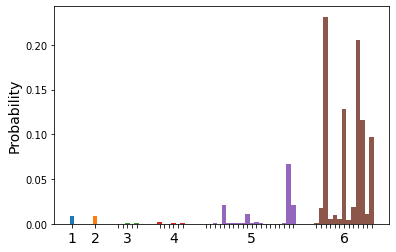

In [18]:
decision_probability_bar(decision_list)

上图使用柱状图的形式展示了 86 条决策规则的概率值，并且按照决策规则的最终决策属性的取值进行了分区. 

例如，决策结果为 1 的决策规则只有 1 条，其概率约为 $0.008403$，即图中从左数第一根柱形图.

3. 节点脆弱性风险

节点脆弱性在对应离散分区下的层次风险：

$$
  P_j = \sum_{l=1}^MP_{\text{Rule}l}(j_{A_n})
$$

$P_j$ 表示了对于任意节点，通过决策树，做出决策属性为 $j$ 的概率，即各个决策属性为 $j$ 的决策规则的概率求和.
  

In [19]:
risks = get_hierarchical_risk(decision_list)

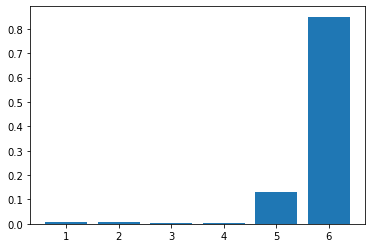

In [20]:
hierarchical_risk_bar(risks)

上图展示了各个决策属性的概率分布，其中决策属性为 $1,2,3$ 的概率值较小，决策属性为 $4,5,6$ 的概率较大，决策属性为 $6$ 的概率尤其大.